In [1]:
from skimage import morphology as skmo
from skimage import io as skio
from skimage.filters import threshold_mean
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dog_path = 'sobaka-400x300.jpeg'
image = skio.imread(dog_path, as_grey=True)
thresh = threshold_mean(image)
binary = image > thresh

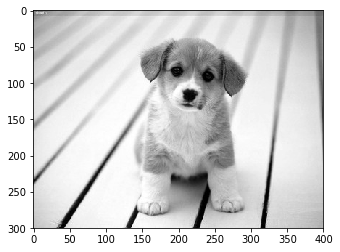

In [3]:
plt.imshow(image, cmap=plt.cm.gray)

In [4]:
def skeletonize(img, mask):
    skeleton_set = []
    while True:
        erosion = skmo.erosion(img, mask)
        if np.sum(erosion) == 0:
            skeleton_set.append(img)
            break
        dilation = skmo.dilation(erosion, mask)
        skeleton_set.append(img ^ (img & dilation))
        img = erosion
    result = skeleton_set[0]
    for skeleton in skeleton_set[1:]:
        result |= skeleton
    return (result, skeleton_set)

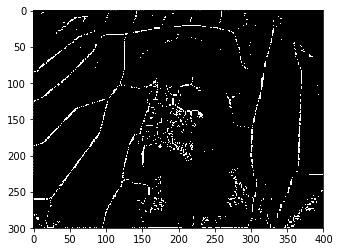

In [5]:
plt.imshow(skeletonize(binary, np.ones((3, 3)))[0], cmap=plt.cm.gray)

In [19]:
def get_histogram(img):
    tmpBins = np.linspace(0, 256, 100)
    tmpImg = img * 256
    plt.hist(tmpImg.reshape(-1), tmpBins)

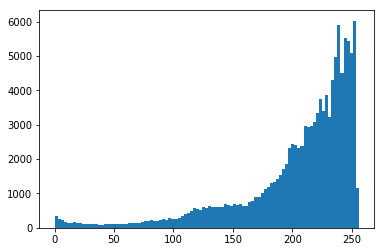

In [20]:
get_histogram(image)

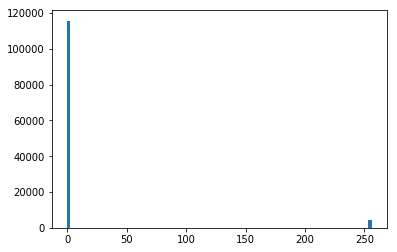

In [21]:
get_histogram(skeletonize(binary, np.ones((3, 3)))[0])

# Case 1

Пройтись по картинке фильтром лапки кота в разных положениях и затем подчиcтить места, где филтр показывает наличие лапки кота.

# Case 2

Посчитать градиенты во всех пикселях изображений, а затем подкрасить пиксели с наибольшим градиентом.

# Case 3

Нагенерить признаков, запустить knn.